# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# LOADING DATA

In [ ]:
inf = pd.read_csv('PCOS_infertility.csv')
woinf = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

In [ ]:
# Looking at the data with infertile patients.

inf.head()

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26

In [ ]:
# Looking at the data with non-infertile patients.

woinf.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  

[5 rows x 45 columns]

# DATA PREPROCESSING

In [ ]:
# Looking at the columns of data with non-infertile patients.

woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
# Merging the two files as per patient file no.
# The files were sorted into two based on patients with infertility and without infertility

data = pd.merge(woinf,inf, on='Patient File No.', suffixes={'','_wo'},how='left')

In [ ]:
#Dropping the repeated features after merging.

data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo','II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [ ]:
# Changing the title of the properties.

data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [ ]:
# Looking at the merged data.

data.head()

Sl. No  Patient File No.  Target   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1       0          28         44.6        152.0   
1       2                 2       0          36         65.0        161.5   
2       3                 3       1          33         68.8        165.0   
3       4                 4       0          37         65.0        148.0   
4       5                 5       0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                 18.0                  18.0               8.5  
1                 15.0                  14.0               3.7  
2                 18.0                  20.0              10.0  
3                 15.0                  14.0               7.5  
4                 16.0                  14.0               7.0  

[5 rows x 44 columns]

In [ ]:
# Dropping unnecessary features.

data = data.drop(["Sl. No","Patient File No."],axis = 1)

In [ ]:
data.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Target                  int64  
 1    Age (yrs)              int64  
 2   Weight (Kg)             float64
 3   Height(Cm)              float64
 4   BMI                     float64
 5   Blood Group             int64  
 6   Pulse rate(bpm)         int64  
 7   RR (breaths/min)        int64  
 8   Hb(g/dl)                float64
 9   Cycle(R/I)              int64  
 10  Cycle length(days)      int64  
 11  Marraige Status (Yrs)   float64
 12  Pregnant(Y/N)           int64  
 13  No. of aborptions       int64  
 14    I   beta-HCG(mIU/mL)  float64
 15  II    beta-HCG(mIU/mL)  object 
 16  FSH(mIU/mL)             float64
 17  LH(mIU/mL)              float64
 18  FSH/LH                  float64
 19  Hip(inch)               int64  
 20  Waist(inch)             int64  
 21  Waist:Hip Ratio         float64
 22  TS

In [ ]:
# Having a look at the data with dtype objects.

data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [ ]:
# Similarly,

data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [ ]:
# Dealing with categorical values.
# In this database the type objects are numeric values saved as strings.
# So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
# Dealing with missing values.
# Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)

data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [ ]:
# Clearing up the extra space in the column names.

data.columns = [col.strip() for col in data.columns]

# VARIABLE DESCRIPTION

In [ ]:
colors = ['#670067','#008080']

## Categorical Variable

In [ ]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count

    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

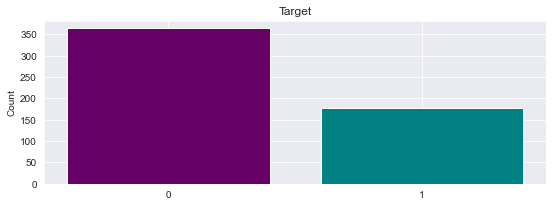

Target: 
 0    364
1    177
Name: Target, dtype: int64


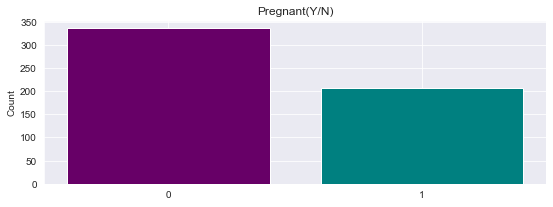

Pregnant(Y/N): 
 0    335
1    206
Name: Pregnant(Y/N), dtype: int64


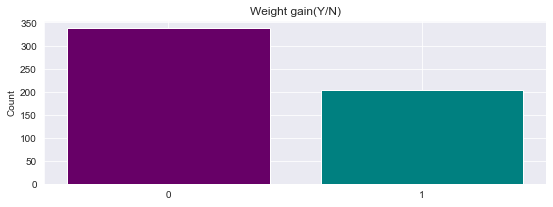

Weight gain(Y/N): 
 0    337
1    204
Name: Weight gain(Y/N), dtype: int64


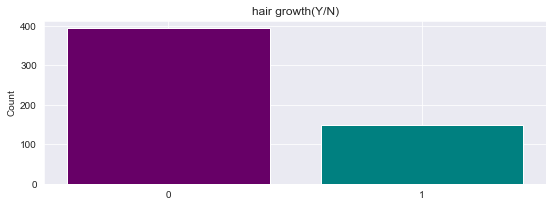

hair growth(Y/N): 
 0    393
1    148
Name: hair growth(Y/N), dtype: int64


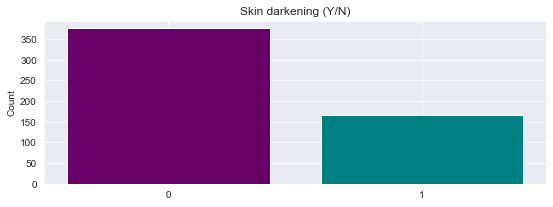

Skin darkening (Y/N): 
 0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


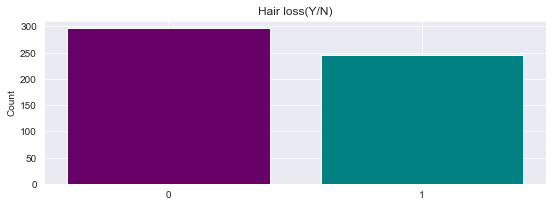

Hair loss(Y/N): 
 0    296
1    245
Name: Hair loss(Y/N), dtype: int64


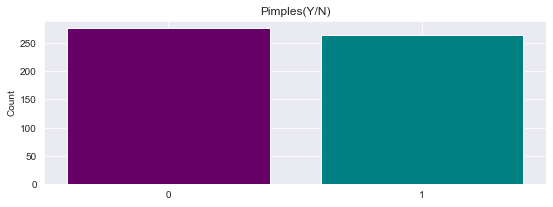

Pimples(Y/N): 
 0    276
1    265
Name: Pimples(Y/N), dtype: int64


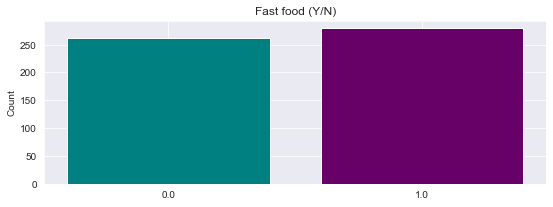

Fast food (Y/N): 
 1.0    279
0.0    262
Name: Fast food (Y/N), dtype: int64


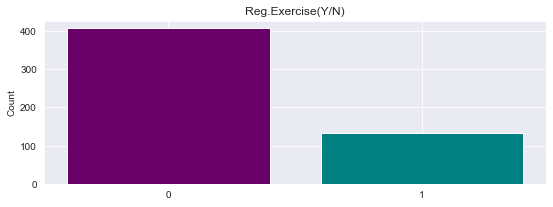

Reg.Exercise(Y/N): 
 0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


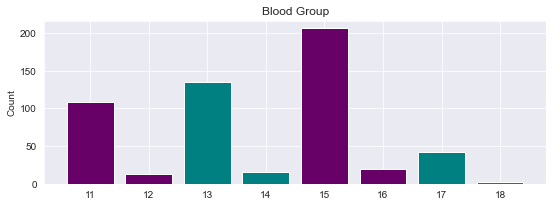

Blood Group: 
 15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

## Numerical Variable

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

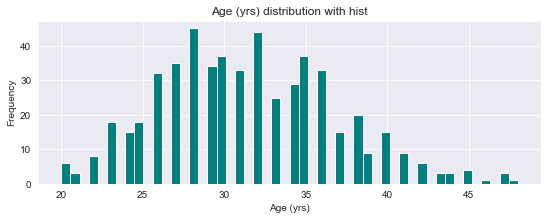

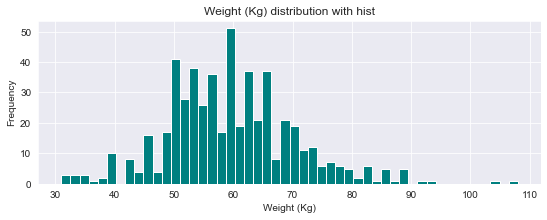

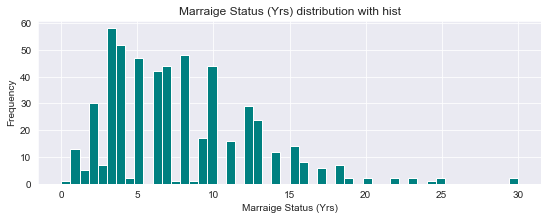

In [ ]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Having a look at some basic statistical details.

data.describe()

Target   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  \
count  541.000000  541.000000   541.000000  541.000000  541.000000   
mean     0.327172   31.430684    59.637153  156.484835   24.311285   
std      0.469615    5.411006    11.028287    6.033545    4.056399   
min      0.000000   20.000000    31.000000  137.000000   12.417882   
25%      0.000000   28.000000    52.000000  152.000000   21.641274   
50%      0.000000   31.000000    59.000000  156.000000   24.238227   
75%      1.000000   35.000000    65.000000  160.000000   26.634958   
max      1.000000   48.000000   108.000000  180.000000   38.900000   

       Blood Group  Pulse rate(bpm)  RR (breaths/min)    Hb(g/dl)  Cycle(R/I)  \
count   541.000000       541.000000        541.000000  541.000000  541.000000   
mean     13.802218        73.247689         19.243993   11.160037    2.560074   
std       1.840812         4.430285          1.688629    0.866904    0.901950   
min      11.000000        13.000000         16.000000    8.500000    2.000000   
25%      13.000000        72.000000         18.000000   10.500000    2.000000   
50%      14.000000        72.000000         18.000000   11.000000    2.000000   
75%      15.000000        74.000000         20.000000   11.700000    4.000000   
max      18.000000        82.000000         28.000000   14.800000    5.000000   

       ...  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
count  ...    541.000000       541.000000         541.000000   
mean   ...      0.489834         0.515712           0.247689   
std    ...      0.500359         0.500216           0.432070   
min    ...      0.000000         0.000000           0.000000   
25%    ...      0.000000         0.000000           0.000000   
50%    ...      0.000000         1.000000           0.000000   
75%    ...      1.000000         1.000000           0.000000   
max    ...      1.000000         1.000000           1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           541.000000            541.000000        541.000000   
mean            114.661738             76.927911          6.129390   
std               7.384556              5.574112          4.229294   
min              12.000000              8.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        541.000000            541.000000            541.000000   
mean           6.641405             15.018115             15.451701   
std            4.436889              3.566839              3.318848   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  
count        541.000000  
mean           8.475915  
std            2.165381  
min            0.000000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 42 columns]

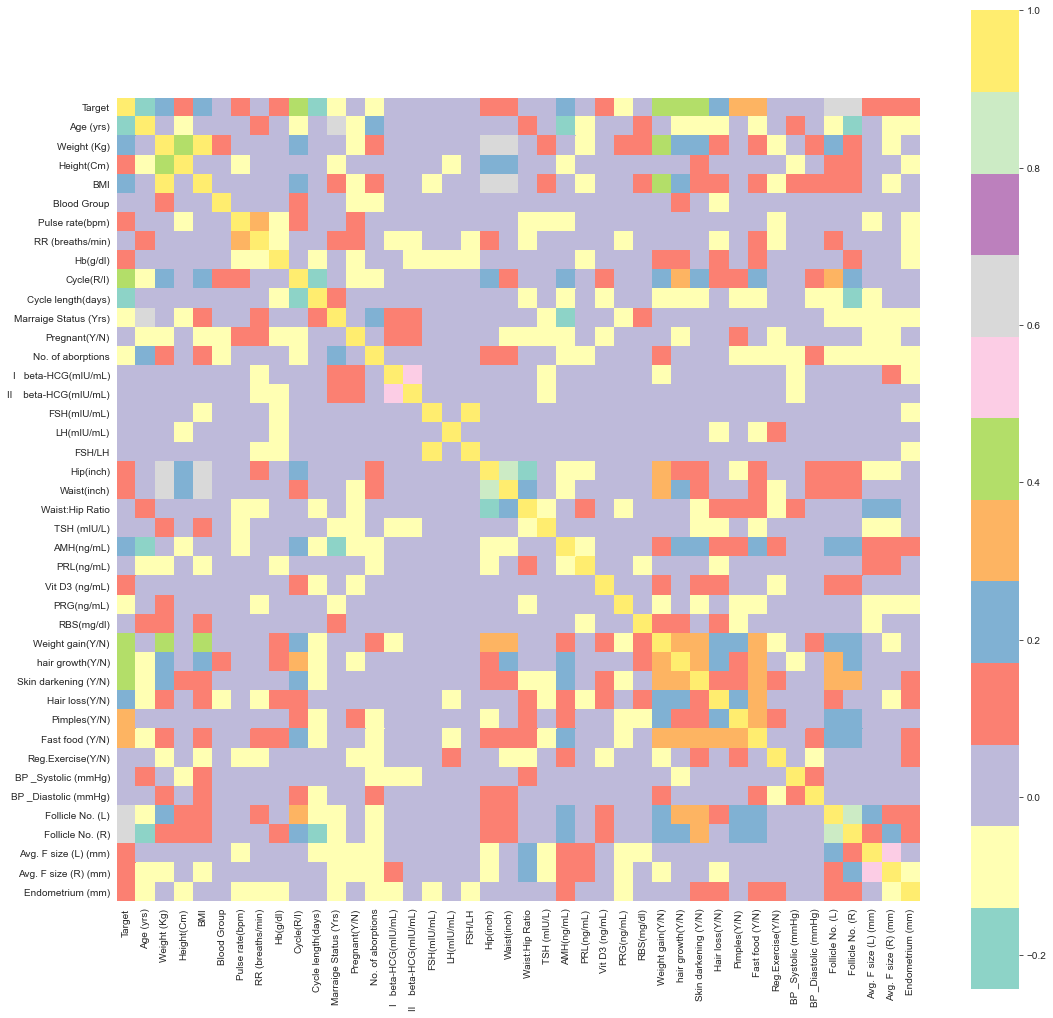

In [ ]:
# Examaning a correlation matrix of all the features.

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

In [ ]:
# How all the features correlate with the PCOS.

corrmat['Target'].sort_values(ascending=False)

Target                    1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

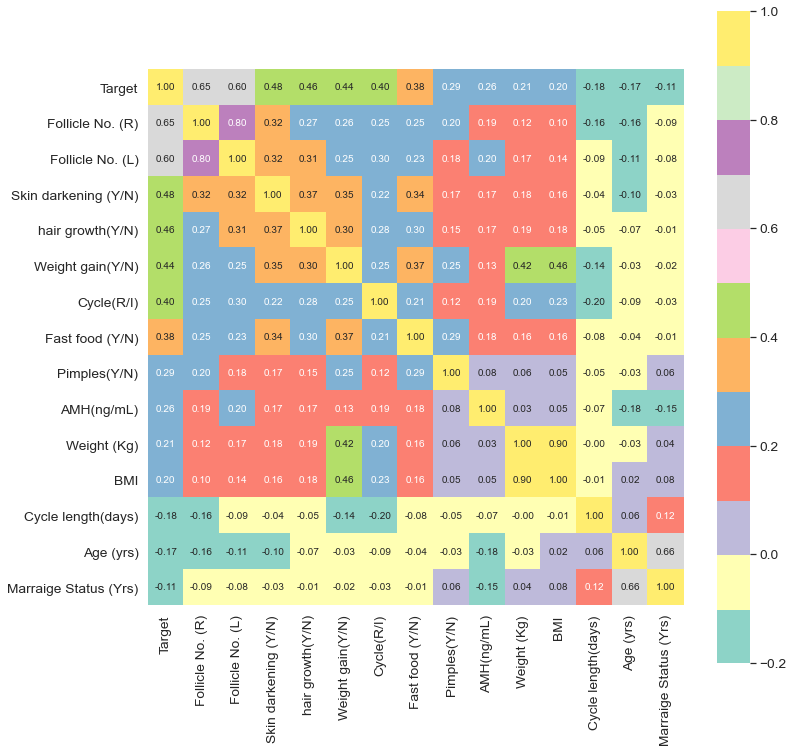

In [ ]:
# Having a look at features bearing significant correlation.

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set3", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Patterns Of Length Of The Menstrual Cycle

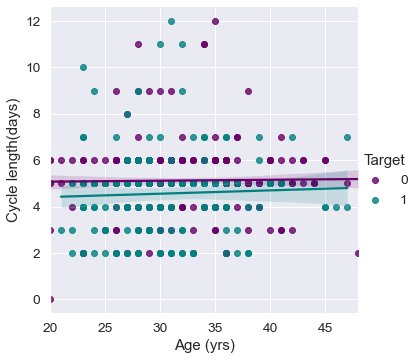

In [ ]:
# Length of menstrual phase in PCOS vs normal

fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=colors)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

## Patterns Of BMI

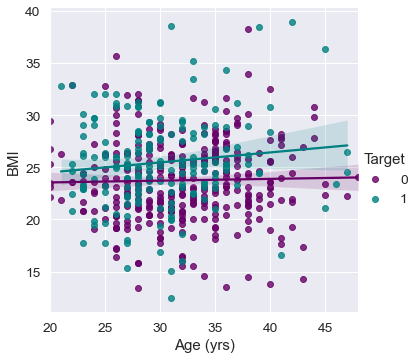

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal.

fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

## Patterns Of Irregularity In Mensuration

Apparently in the feature "Cycle(R/I)" value:

* 4 indicates irregular menstrual cycle

* 2 indicates a regular menstrual cycle

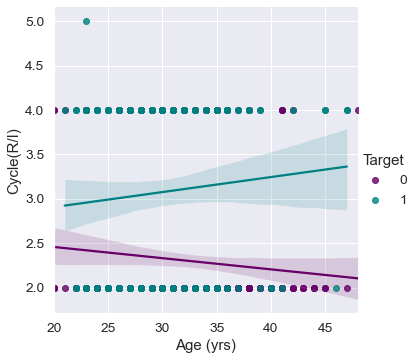

In [ ]:
# Cycle IR wrt age

sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

## Number Of Follicles

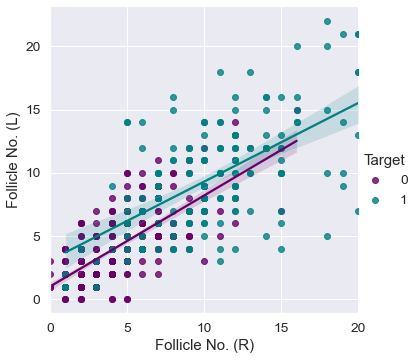

In [ ]:
# Distribution of follicles in both ovaries.

sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient.

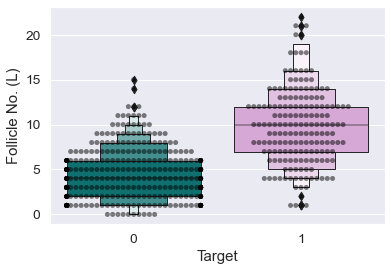

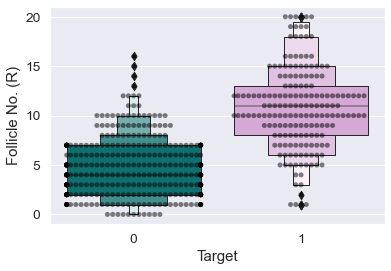

In [ ]:
# Exploring the above observation with the help of Boxplot

color = ["teal", "plum"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well.

## Some Miscellaneous EDA

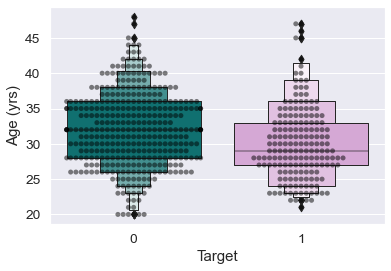

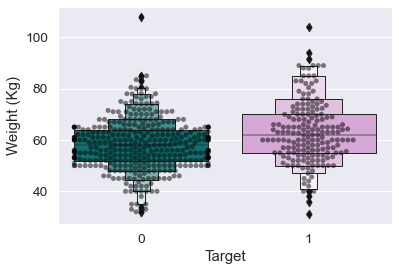

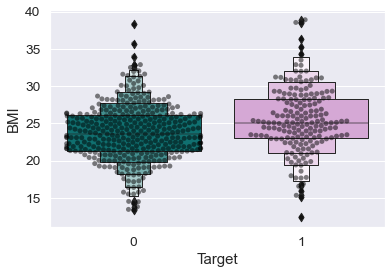

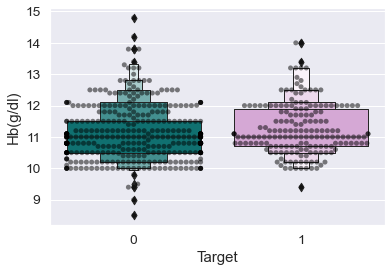

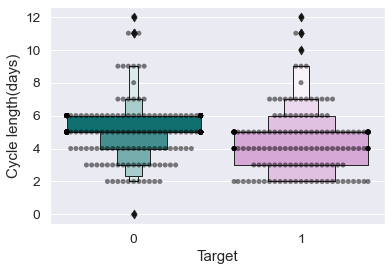

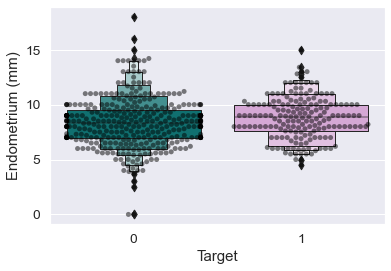

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

# DATA MODELING

## Train - Test Split

In [ ]:
#Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [ ]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


## Simple Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 88.36
Testing Accuracy: % 82.82


## Grid Search

Here, taking 5 Machine Learning classifiers and evaluating the mean accuracy of each of them by stratified cross
validation.
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

# Decision Tree
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

# SVM
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

# KNN
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2292 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


84.42
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


68.79
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


91.02
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


85.97
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


74.32


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.0s finished


In [ ]:
best_estimators

[DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=42),
 SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42),
 LogisticRegression(C=1000.0, random_state=42),
 KNeighborsClassifier(metric='manhattan', weights='distance')]

In [ ]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

## XGBRF and CatBoost

In [ ]:
# XGBRF Classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=random_state)
xgb_clf.fit(X_train,y_train)
acc_xgb_clf_train = round(xgb_clf.score(X_train, y_train)*100,2)
acc_xgb_clf_test = round(xgb_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_xgb_clf_train)
print("Training Accuracy: % {}".format(acc_xgb_clf_train))
print("Testing Accuracy: % {}".format(acc_xgb_clf_test))

[01:02:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: % 91.8
Testing Accuracy: % 85.89


In [ ]:
# CatBoost Classifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
acc_cat_clf_train = round(cat_clf.score(X_train, y_train)*100,2)
acc_cat_clf_test = round(cat_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_cat_clf_train)
print("Training Accuracy: % {}".format(acc_cat_clf_train))
print("Testing Accuracy: % {}".format(acc_cat_clf_test))

Learning rate set to 0.0068
0:	learn: 0.6869194	total: 239ms	remaining: 3m 58s
1:	learn: 0.6811969	total: 242ms	remaining: 2m
2:	learn: 0.6756648	total: 245ms	remaining: 1m 21s
3:	learn: 0.6692775	total: 248ms	remaining: 1m 1s
4:	learn: 0.6619594	total: 250ms	remaining: 49.8s
5:	learn: 0.6583294	total: 253ms	remaining: 41.9s
6:	learn: 0.6527700	total: 255ms	remaining: 36.2s
7:	learn: 0.6485204	total: 258ms	remaining: 31.9s
8:	learn: 0.6430350	total: 260ms	remaining: 28.6s
9:	learn: 0.6380500	total: 262ms	remaining: 26s
10:	learn: 0.6325660	total: 265ms	remaining: 23.8s
11:	learn: 0.6261979	total: 267ms	remaining: 22s
12:	learn: 0.6219478	total: 269ms	remaining: 20.4s
13:	learn: 0.6164831	total: 272ms	remaining: 19.1s
14:	learn: 0.6107033	total: 274ms	remaining: 18s
15:	learn: 0.6072010	total: 276ms	remaining: 17s
16:	learn: 0.6023006	total: 279ms	remaining: 16.1s
17:	learn: 0.5974142	total: 281ms	remaining: 15.3s
18:	learn: 0.5930464	total: 283ms	remaining: 14.6s
19:	learn: 0.5891335	t

219:	learn: 0.2177566	total: 743ms	remaining: 2.63s
220:	learn: 0.2168939	total: 745ms	remaining: 2.63s
221:	learn: 0.2163517	total: 748ms	remaining: 2.62s
222:	learn: 0.2157654	total: 750ms	remaining: 2.61s
223:	learn: 0.2150405	total: 752ms	remaining: 2.6s
224:	learn: 0.2146542	total: 755ms	remaining: 2.6s
225:	learn: 0.2140461	total: 757ms	remaining: 2.59s
226:	learn: 0.2135063	total: 759ms	remaining: 2.58s
227:	learn: 0.2127365	total: 762ms	remaining: 2.58s
228:	learn: 0.2121472	total: 764ms	remaining: 2.57s
229:	learn: 0.2113471	total: 767ms	remaining: 2.57s
230:	learn: 0.2107945	total: 769ms	remaining: 2.56s
231:	learn: 0.2101033	total: 771ms	remaining: 2.55s
232:	learn: 0.2092782	total: 775ms	remaining: 2.55s
233:	learn: 0.2086451	total: 777ms	remaining: 2.54s
234:	learn: 0.2080740	total: 779ms	remaining: 2.54s
235:	learn: 0.2076215	total: 781ms	remaining: 2.53s
236:	learn: 0.2070615	total: 783ms	remaining: 2.52s
237:	learn: 0.2064647	total: 786ms	remaining: 2.51s
238:	learn: 0.

443:	learn: 0.1303506	total: 1.25s	remaining: 1.56s
444:	learn: 0.1299834	total: 1.25s	remaining: 1.56s
445:	learn: 0.1298154	total: 1.25s	remaining: 1.56s
446:	learn: 0.1296177	total: 1.25s	remaining: 1.55s
447:	learn: 0.1291295	total: 1.26s	remaining: 1.55s
448:	learn: 0.1288993	total: 1.26s	remaining: 1.55s
449:	learn: 0.1287185	total: 1.26s	remaining: 1.54s
450:	learn: 0.1285697	total: 1.26s	remaining: 1.54s
451:	learn: 0.1282824	total: 1.27s	remaining: 1.54s
452:	learn: 0.1280802	total: 1.27s	remaining: 1.53s
453:	learn: 0.1278234	total: 1.27s	remaining: 1.53s
454:	learn: 0.1276992	total: 1.27s	remaining: 1.53s
455:	learn: 0.1275195	total: 1.28s	remaining: 1.52s
456:	learn: 0.1272771	total: 1.28s	remaining: 1.52s
457:	learn: 0.1269904	total: 1.28s	remaining: 1.52s
458:	learn: 0.1266950	total: 1.28s	remaining: 1.51s
459:	learn: 0.1265429	total: 1.29s	remaining: 1.51s
460:	learn: 0.1264698	total: 1.29s	remaining: 1.51s
461:	learn: 0.1263480	total: 1.29s	remaining: 1.5s
462:	learn: 0

646:	learn: 0.0952104	total: 1.76s	remaining: 958ms
647:	learn: 0.0950267	total: 1.76s	remaining: 955ms
648:	learn: 0.0949128	total: 1.76s	remaining: 953ms
649:	learn: 0.0947440	total: 1.76s	remaining: 950ms
650:	learn: 0.0945942	total: 1.77s	remaining: 948ms
651:	learn: 0.0944172	total: 1.77s	remaining: 945ms
652:	learn: 0.0942624	total: 1.77s	remaining: 942ms
653:	learn: 0.0940913	total: 1.78s	remaining: 940ms
654:	learn: 0.0940611	total: 1.78s	remaining: 937ms
655:	learn: 0.0939043	total: 1.78s	remaining: 935ms
656:	learn: 0.0938379	total: 1.78s	remaining: 932ms
657:	learn: 0.0937180	total: 1.79s	remaining: 929ms
658:	learn: 0.0936524	total: 1.79s	remaining: 927ms
659:	learn: 0.0936083	total: 1.79s	remaining: 924ms
660:	learn: 0.0935086	total: 1.8s	remaining: 921ms
661:	learn: 0.0934079	total: 1.8s	remaining: 919ms
662:	learn: 0.0931903	total: 1.8s	remaining: 916ms
663:	learn: 0.0930817	total: 1.8s	remaining: 913ms
664:	learn: 0.0929839	total: 1.81s	remaining: 910ms
665:	learn: 0.09

830:	learn: 0.0734634	total: 2.27s	remaining: 462ms
831:	learn: 0.0732896	total: 2.27s	remaining: 459ms
832:	learn: 0.0731081	total: 2.28s	remaining: 457ms
833:	learn: 0.0729346	total: 2.28s	remaining: 454ms
834:	learn: 0.0728005	total: 2.29s	remaining: 452ms
835:	learn: 0.0726395	total: 2.29s	remaining: 449ms
836:	learn: 0.0725086	total: 2.29s	remaining: 446ms
837:	learn: 0.0723968	total: 2.29s	remaining: 444ms
838:	learn: 0.0722585	total: 2.3s	remaining: 441ms
839:	learn: 0.0721292	total: 2.3s	remaining: 438ms
840:	learn: 0.0720835	total: 2.3s	remaining: 436ms
841:	learn: 0.0719758	total: 2.31s	remaining: 433ms
842:	learn: 0.0718128	total: 2.31s	remaining: 430ms
843:	learn: 0.0715827	total: 2.31s	remaining: 428ms
844:	learn: 0.0714389	total: 2.31s	remaining: 425ms
845:	learn: 0.0712864	total: 2.32s	remaining: 422ms
846:	learn: 0.0711806	total: 2.32s	remaining: 419ms
847:	learn: 0.0710266	total: 2.32s	remaining: 417ms
848:	learn: 0.0710030	total: 2.33s	remaining: 414ms
849:	learn: 0.0

Training Accuracy: % 100.0
Testing Accuracy: % 87.73


# RESULT

Showing the model, accuracy and confusion matrix.

In [ ]:
model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','KNearestNeighbours','XGBRF','CatBoostClassifier']

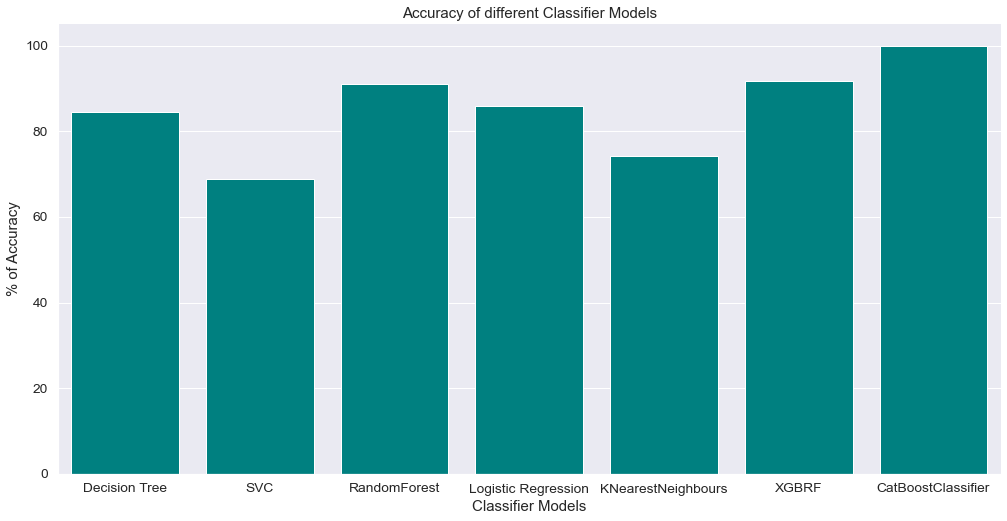

In [ ]:
fg = sns.factorplot(x = model_list, y = cv_result, size= 7, aspect=2 ,color= colors[1], saturation=5,kind='bar', data=data)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')

plt.show()


In [ ]:
# Plotly Bar Chart:

import plotly.graph_objects as go
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(32, 55, 110)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
model = [dt,svm,rf,lr,knn,xgb_clf,cat_clf]
predictions = []

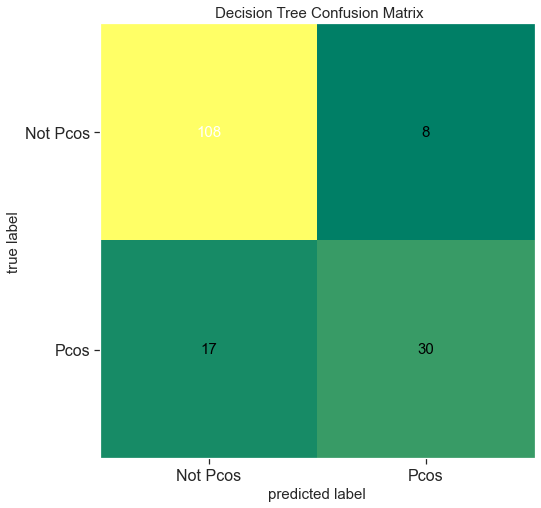

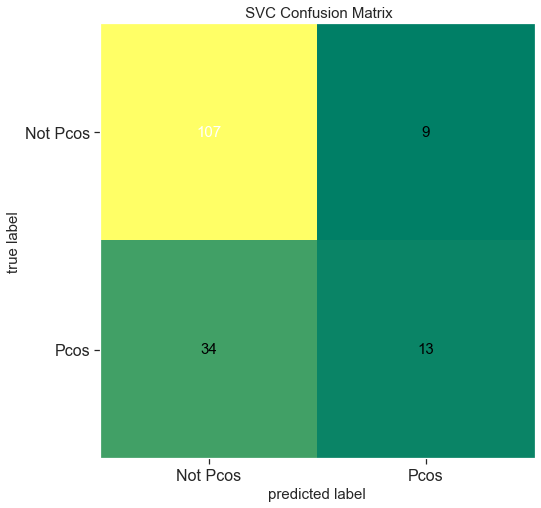

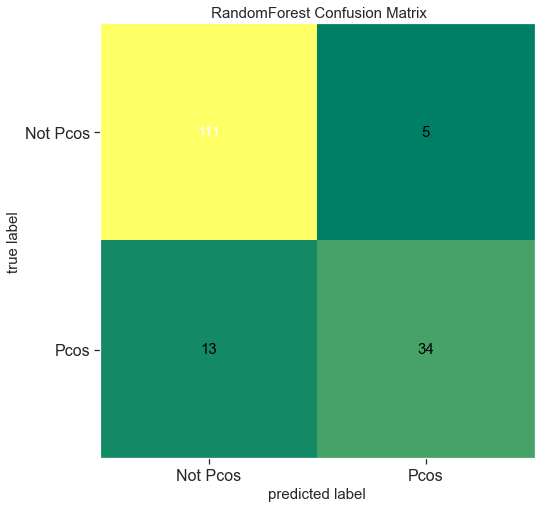

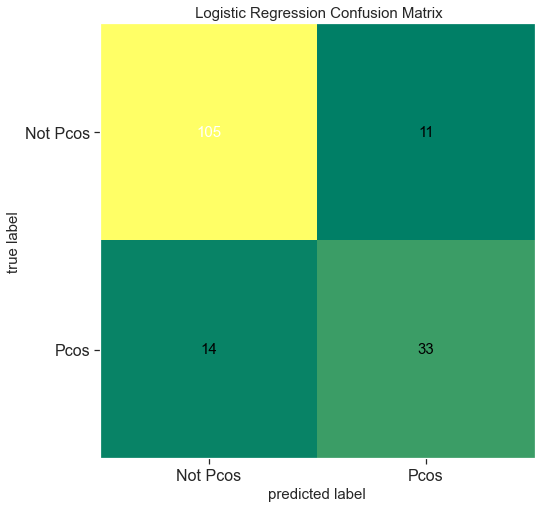

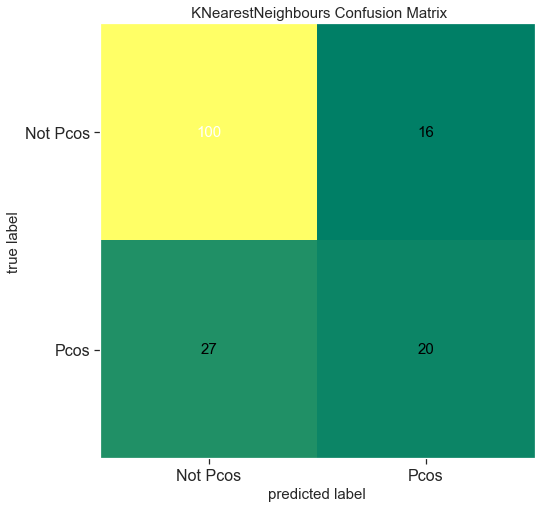

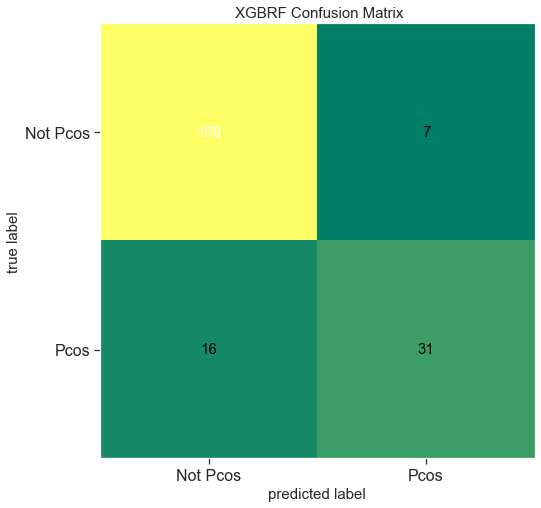

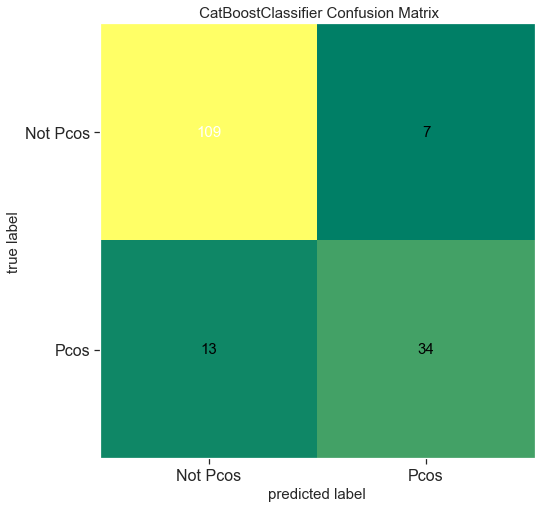

In [ ]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(7):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.summer)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()